# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.

To meet the requirements for this project, you will need to achieve an accuracy greater than 45%. 
If you want to beat Detectocorp's algorithm, you'll need to achieve an accuracy greater than 70%. 
(Beating Detectocorp's algorithm is not a requirement for passing this project, but you're encouraged to try!)

Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
## YOUR CODE HERE ##
trainTransform = transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor()])

testTransform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor()])

# Create training set and define training dataloader
## YOUR CODE HERE ##

trainData = datasets.CIFAR10(root="./data", train=True, transform=trainTransform, download=True)
trainLoader = torch.utils.data.DataLoader(trainData, batch_size=64, shuffle=True)


# Create test set and define test dataloader
## YOUR CODE HERE ##

testData = datasets.CIFAR10(root="./data", train=False, transform=testTransform, download=True)
testLoader = torch.utils.data.DataLoader(testData, batch_size=64)


# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

cat


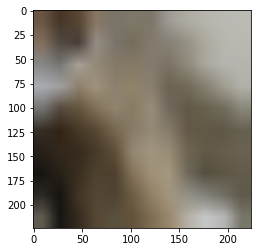

cat


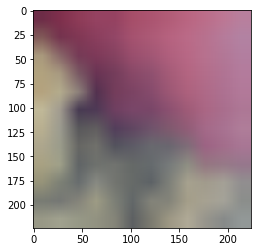

truck


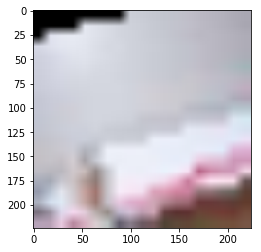

horse


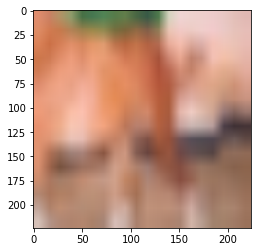

cat


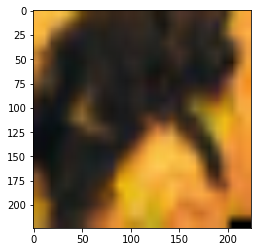

In [7]:
# Explore data
## YOUR CODE HERE ##
show5(trainLoader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [8]:
## YOUR CODE HERE ##
model = models.densenet121(pretrained=True)

for param in model.parameters(): # Freeze parameters
    param.requires_grad = False

classifier = nn.Sequential(nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Dropout(p=0.2),
                           nn.Linear(512, 10),
                           nn.LogSoftmax(dim=1))

model.classifier = classifier
model

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 93986249.70it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [43]:
## YOUR CODE HERE ##
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)
epochs = 5
trainLoss = 0

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [44]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
xTrain = []
yTrain = []
for epoch in range(epochs):
    trainLoss = 0
    for numTrain, (images, labels) in enumerate(trainLoader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        trainLoss += loss.item()
        
        if numTrain == 250:
            
            print("Number of Epochs: {}".format(epoch+1))
            print("Number of Training Batches: {}".format(numTrain))
            print("Training Loss: {:.3f}".format(trainLoss/numTrain))
            
            xTrain.append(epoch+1)
            yTrain.append(trainLoss/numTrain)
            break

Number of Epochs: 1
Number of Training Batches: 250
Training Loss: 1.361
Number of Epochs: 2
Number of Training Batches: 250
Training Loss: 1.365
Number of Epochs: 3
Number of Training Batches: 250
Training Loss: 1.356
Number of Epochs: 4
Number of Training Batches: 250
Training Loss: 1.332
Number of Epochs: 5
Number of Training Batches: 250
Training Loss: 1.338


Plot the training loss (and validation loss/accuracy, if recorded).

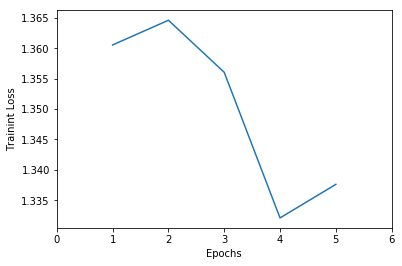

In [45]:
## YOUR CODE HERE ##
plt.plot(xTrain, yTrain)
plt.xlabel("Epochs")
plt.xlim(0, 6)
plt.ylabel("Trainint Loss")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [46]:
## YOUR CODE HERE ##
model.eval()
testLoss = 0
accuracySum = 0
accuracyList = []


for images, labels in testLoader:
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    loss = criterion(output, labels)
    testLoss += loss.item()

    outputPb = torch.exp(output)
    topP, topClass = outputPb.topk(1, dim=1)
    equals = topClass == labels.view(*topClass.shape)
    accuracy = torch.mean(equals.type(torch.FloatTensor))
    accuracyList.append(accuracy)
    accuracySum += accuracy

print("Test Loss: {:.3f}".format(testLoss/len(testLoader)))
print("Accuracy List: {}".format(accuracyList))
print("Accuracy Average: {:.3f}".format(accuracySum/len(testLoader)))



Test Loss: 0.881
Accuracy List: [tensor(0.6562), tensor(0.6250), tensor(0.6250), tensor(0.6094), tensor(0.5625), tensor(0.6875), tensor(0.7188), tensor(0.7188), tensor(0.7656), tensor(0.6094), tensor(0.6719), tensor(0.6875), tensor(0.4844), tensor(0.6406), tensor(0.7031), tensor(0.7031), tensor(0.7188), tensor(0.7031), tensor(0.7031), tensor(0.6875), tensor(0.6562), tensor(0.6875), tensor(0.6250), tensor(0.7344), tensor(0.6094), tensor(0.7031), tensor(0.6875), tensor(0.7656), tensor(0.6406), tensor(0.6406), tensor(0.6406), tensor(0.6719), tensor(0.7344), tensor(0.5938), tensor(0.6719), tensor(0.5938), tensor(0.6719), tensor(0.7031), tensor(0.7656), tensor(0.6094), tensor(0.6094), tensor(0.6719), tensor(0.8125), tensor(0.5781), tensor(0.7656), tensor(0.7969), tensor(0.8125), tensor(0.6094), tensor(0.5781), tensor(0.7656), tensor(0.6406), tensor(0.7344), tensor(0.7031), tensor(0.6406), tensor(0.7188), tensor(0.7031), tensor(0.6875), tensor(0.7656), tensor(0.7344), tensor(0.7344), tensor(

## Saving your model
Using `torch.save`, save your model for future loading.

In [49]:
len(testLoader)

157

In [47]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), "checkpoint.pth")

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

Some things to consider as you formulate your recommendation:
* How does your model compare to Detectocorp's model?
* How does it compare to the far more advanced solutions in the literature? 
* What did you do to get the accuracy you achieved? 
* Is it necessary to improve this accuracy? If so, what sort of work would be involved in improving it?



**Double click this cell to modify it**

The model built in the project has an accuracy rate of 68.7% on the CIFAR-10 dataset. It is comparable to Detectocorp's model. However, it had a much less accuracy rate compared to the advanced solutions that had over 90% accuracy rates.

The model was built by using the pre-trained network "densenet161". It was trained with 250 batches (25 batches for each epoch and 10 epoches in total) in the first place. The problems were the training loss did not decrease significantly, the training speed was too slow, and the accuracy rate was not desirable when substituted the trained weights to the test set. Therefore, the network "densenet161" was replaced with the pre-trained network "densenet121". The reason for the replacement was that "densenet121" has fewer layers than "densenet161". The model would be more efficient when increased batches from 25 to 250 each epoch for lower training loss and higher accuracy rate.

It is necessary to improve the accuracy rate. A model with a low training loss might be overfitted. Achieving a higher accuracy rate based on the test set enables a model to classify new datasets more accurately. There are many ways to improve the accuracy rate. Deciding how many batches and epochs a model trains affects the accuracy rate. Choosing a model between using transfer learning models and constructing a network from scratch is essential to a higher accuracy rate.


## Submit Your Project

When you are finished editing the notebook and are ready to turn it in, simply click the **SUBMIT PROJECT** button in the lower right.

Once you submit your project, we'll review your work and give you feedback if there's anything that you need to work on. If you'd like to see the exact points that your reviewer will check for when looking at your work, you can have a look over the project [rubric](https://review.udacity.com/#!/rubrics/3077/view).